# Introduction to Cross-Validation - Lab

## Introduction

In this lab, you'll be able to practice your cross-validation skills!


## Objectives

You will be able to:

- Compare the results with normal holdout validation
- Apply 5-fold cross validation for regression

## Let's get started

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

# these features were chose by "recursive feature elimnination" 
boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features["B"]
logdis = np.log(boston_features["DIS"])
loglstat = np.log(boston_features["LSTAT"])

# minmax scaling
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

#standardization
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [17]:
boston_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,0.542096,1.0,296.0,15.3,1.000000,-1.275260
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,0.623954,2.0,242.0,17.8,1.000000,-0.263711
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,0.623954,2.0,242.0,17.8,0.989737,-1.627858
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,0.707895,3.0,222.0,18.7,0.994276,-2.153192
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,0.707895,3.0,222.0,18.7,1.000000,-1.162114


In [4]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = pd.DataFrame(boston.target,columns = ['target'])

In [5]:
X.head()

,CHAS,RM,DIS,B,LSTAT
0,0.0,6.575,0.542096,1.000000,-1.275260
1,0.0,6.421,0.623954,1.000000,-0.263711
2,0.0,7.185,0.623954,0.989737,-1.627858
3,0.0,6.998,0.707895,0.994276,-2.153192
4,0.0,7.147,0.707895,1.000000,-1.162114


In [5]:
y.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Train test split

Perform a train-test-split with a test set of 0.20.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [9]:
len(X_train), len(X_test), len(X)
len(y_train), len(y_test), len(y) # 20% of the data is added to the test 

(404, 102, 506)

Fit the model and apply the model to the make test set predictions

In [10]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

In [11]:
y_hat_test # predicted y values based on the X test values being fed into the linear regression model that is made from the X and Y train


array([[23.11329267],
       [28.73190908],
       [22.30118296],
       [20.26092454],
       [28.27619241],
       [46.19383602],
       [23.33897711],
       [22.30309784],
       [20.87518863],
       [22.52276244],
       [12.4610754 ],
       [33.5216599 ],
       [31.92625594],
       [18.77952043],
       [17.78652826],
       [27.05032324],
       [17.61741304],
       [16.01043117],
       [32.10670021],
       [19.71196256],
       [20.34660114],
       [29.5517744 ],
       [44.45824567],
       [28.33041377],
       [24.95063446],
       [18.24521961],
       [35.18871727],
       [11.42678909],
       [19.82393582],
       [14.15670952],
       [17.55648757],
       [17.20627309],
       [18.38946152],
       [21.79885673],
       [27.45193363],
       [ 8.43225728],
       [18.92562055],
       [10.25147728],
       [22.42009037],
       [39.31687123],
       [30.63902073],
       [22.31451987],
       [17.10895009],
       [31.77203637],
       [12.27758039],
       [37

Calculate the residuals and the mean squared error

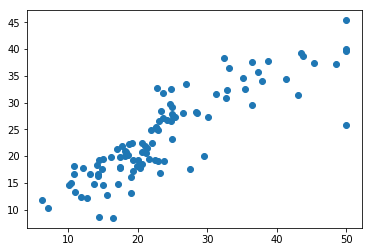

In [47]:
plt.scatter(y_test, y_hat_test)

In [48]:
from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

25.93293930165281

## Cross-Validation: let's build it from scratch!

### Create a cross-validation function

Write a function k-folds that splits a dataset into k evenly sized pieces.
If the full dataset is not divisible by k, make the first few folds one larger then later ones.

We want the folds to be a list of subsets of data!

In [44]:
def kfolds(data, k):
    data = pd.DataFrame(data)

    # Force data as pandas dataframe
    # add 1 to fold size to account for leftovers           
    return  np.array_split(data, k, axis = 0)

,CHAS,RM,DIS,B,LSTAT,target
0,0.0,6.575,0.542096,1.000000,-1.275260,24.0
1,0.0,6.421,0.623954,1.000000,-0.263711,21.6
2,0.0,7.185,0.623954,0.989737,-1.627858,34.7
3,0.0,6.998,0.707895,0.994276,-2.153192,33.4
4,0.0,7.147,0.707895,1.000000,-1.162114,36.2


### Apply it to the Boston Housing Data

In [45]:
# concatenating our two separate data frames of features and target
boston_data = pd.concat([X,y], axis = 1)
boston_data.head()

,CHAS,RM,DIS,B,LSTAT,target
0,0.0,6.575,0.542096,1.000000,-1.275260,24.0
1,0.0,6.421,0.623954,1.000000,-0.263711,21.6
2,0.0,7.185,0.623954,0.989737,-1.627858,34.7
3,0.0,6.998,0.707895,0.994276,-2.153192,33.4
4,0.0,7.147,0.707895,1.000000,-1.162114,36.2


In [59]:
boston_folds = kfolds(boston_data,5)

In [65]:
for fold in boston_folds:
    print(fold.B.count())

102
101
101
101
101


### Perform a linear regression for each fold, and calculate the training and test error

Perform linear regression on each and calculate the training and test error.

In [77]:
test_errs = []
train_errs = []
k=5

for n in range(k):
    train = pd.concat([fold for i,fold in enumerate(boston_folds) if i !=n])
    test = boston_folds[n]
    
    #split each fold data frames into
    #train features, train target, test feautres, and test target
    train_features = train[X.columns]
    train_target = train[y.columns]
    test_features = test[X.columns]
    test_target = test[y.columns]
    
    # Fit a linear regression model using the train data
    linreg.fit(train_features, train_target)
    
    
    #Evaluate Train and Test Errors
    
    # use the linear regression model to predict y
    y_hat_train = linreg.predict(train_features)
    y_hat_test = linreg.predict(test_features)
    
    #evaluate residuals for train and test
    train_residuals = y_hat_train - train_target
    test_residuals = y_hat_test - test_target
    
    train_errs.append(np.mean(train_residuals.astype(float)**2))
    test_errs.append(np.mean(test_residuals.astype(float)**2))
print(train_errs)
print(test_errs)

[target    24.195577
dtype: float64, target    23.032087
dtype: float64, target    19.745073
dtype: float64, target    15.317101
dtype: float64, target    22.329973
dtype: float64]
[target    13.405145
dtype: float64, target    17.444017
dtype: float64, target    37.032711
dtype: float64, target    58.279544
dtype: float64, target    26.097989
dtype: float64]


In [72]:
n = 0
train = pd.concat([fold for i,fold in enumerate(boston_folds) if i !=n])
train[X.columns].head()

,CHAS,RM,DIS,B,LSTAT
102,0.0,6.405,0.369415,0.177720,-0.012136
103,0.0,6.137,0.369415,0.993873,0.378596
104,0.0,6.167,0.321174,0.989384,0.235000
105,0.0,5.851,0.262627,0.992814,0.717270
106,0.0,5.836,0.282946,0.996898,0.925237


## Cross-Validation using Scikit-Learn

This was a bit of work! Now, let's perform 5-fold cross-validation to get the mean squared error through scikit-learn. Let's have a look at the five individual MSEs and explain what's going on.

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

Next, calculate the mean of the MSE over the 5 cross-validations and compare and contrast with the result from the train-test-split case.

Signature: cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv='warn', n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score='raise-deprecating')
Docstring:

In [87]:
cv_results = cross_val_score(linreg, X, y, cv = 5, scoring = "neg_mean_squared_error" )

In [88]:
cv_results

array([-13.40514492, -17.4440168 , -37.03271139, -58.27954385,
       -26.09798876])

In [ ]:
# how does cor

##  Summary 

Congratulations! You now practiced your knowledge on k-fold crossvalidation!